In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set(font_scale=1.5)

**************************************************

Parcel workplace param sweep

**************************************************

Get variables

In [2]:
df = pd.read_pickle('param_sweep.pkl',compression='bz2')
df['NRecovered'] = df['FracRecovered']*df['NStaff']

In [3]:
print(len(df))
NDteams = np.unique(df["NDteams"])
NLteams = np.unique(df["NLteams"])
NOteams = np.unique(df["NOteams"])
TDists = np.unique(df["TeamDistances"])
Phi = np.unique(df["phi"])
II = np.unique(df["InfInit"])
#parameter reminder
print("Td = ", np.unique(df["tD"]))
print('Pisol = ', np.unique(df['Pisol']))
print('Random contact rate = ', np.unique(df['p_contact']))
print('Staff totals = ', np.unique(df['NStaff']))
print(np.sum(df["NDteams"]==3))
print(np.sum(df["NLteams"]==2))
print(np.sum(df["NOteams"]==1))

4320000
Td =  [0.05]
Pisol =  [0.5]
Random contact rate =  [0.02941176]
Staff totals =  [10 20 38 68]
2880000
2880000
3360000


In [4]:
job = ['Driver','Picker','Office']
dfall = df[df["Group"]=='All']
dfall['outbreak'] = (dfall['NRecovered'] > 4)
dfall['Ninfected'] = (dfall.loc[:,'FracRecovered']*dfall.loc[:,'NStaff'] - 1)
dfall['InfJob'] = np.ones(len(dfall),dtype=np.object)
for i in np.arange(3):
    dfall.loc[dfall['InfInit']==i+1,'InfJob'] = job[i]
dfNDT = dfall[(dfall['NLteams'] == 2) & (dfall['NOteams'] == 1)] 
dfNLT = dfall[(dfall['NDteams'] == 3) & (dfall['NOteams'] == 1)] 
dfNOT = dfall[(dfall['NDteams'] == 3) & (dfall['NLteams'] == 2)]

/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tr

Index case to outbreak relation

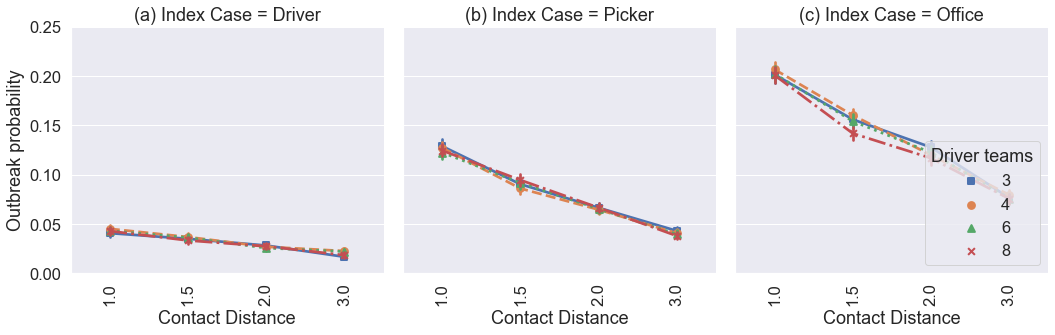

In [9]:
sp = sns.catplot(x='TeamDistances',y='outbreak', hue='NDteams',col='InfInit',data=dfNDT,kind='point',\
                 markers=["s","o","^","x"], linestyles=["-", "--",":","-."], legend=False)
sp.set(xlabel='Contact Distance',ylim=(0,0.25))
axes = sp.axes.flatten()
axes[0].set_ylabel('Outbreak probability')
lab = ['a','b','c']
for i in range(3):
    axes[i].set_title('(%s) Index Case = %s'%(lab[i],job[i]))
sp.set_xticklabels(rotation=90)
plt.legend(loc='lower right',title='Driver teams')
plt.tight_layout()
sp.savefig('param_sweep_outbreak_probability_NDT.png')

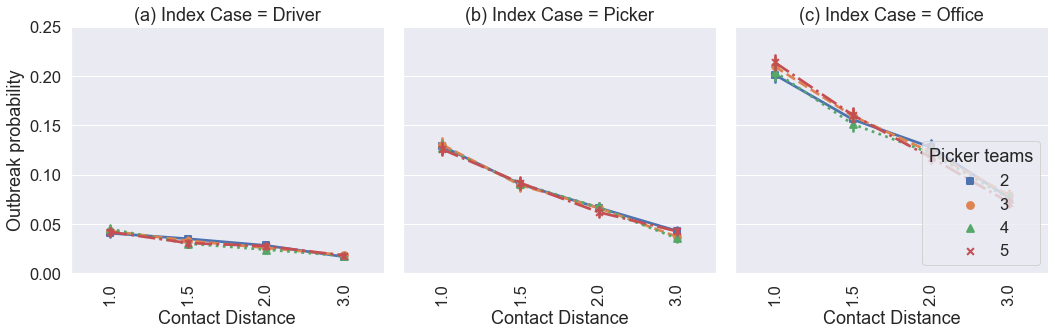

In [6]:
sp = sns.catplot(x='TeamDistances',y='outbreak', hue='NLteams',col='InfInit',data=dfNLT,kind='boxen',\
                 markers=["s","o","^","x"], linestyles=["-", "--",":","-."], legend=False)
sp.set(xlabel='Contact Distance',ylim=(0,0.25))
axes = sp.axes.flatten()
axes[0].set_ylabel('Outbreak probability')
lab = ['a','b','c']
for i in range(3):
    axes[i].set_title('(%s) Index Case = %s'%(lab[i],job[i]))
sp.set_xticklabels(rotation=90)
plt.legend(loc='lower right',title='Picker teams')
plt.tight_layout()
sp.savefig('param_sweep_outbreak_probability_NLT.png')

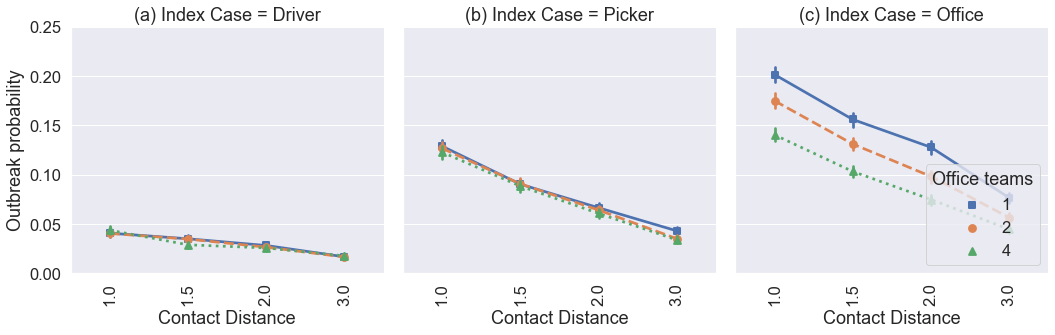

In [27]:
sp = sns.catplot(x='TeamDistances',y='outbreak', hue='NOteams',col='InfInit',data=dfNOT,kind='point',\
                 markers=["s","o","^","x"], linestyles=["-", "--",":","-."], legend=False)
sp.set(xlabel='Contact Distance',ylim=(0,0.25))
axes = sp.axes.flatten()
axes[0].set_ylabel('Outbreak probability')
lab = ['a','b','c']
for i in range(3):
    axes[i].set_title('(%s) Index Case = %s'%(lab[i],job[i]))
sp.set_xticklabels(rotation=90)
plt.legend(loc='lower right',title='Office teams')
plt.tight_layout()
sp.savefig('param_sweep_outbreak_probability_NOT.png')

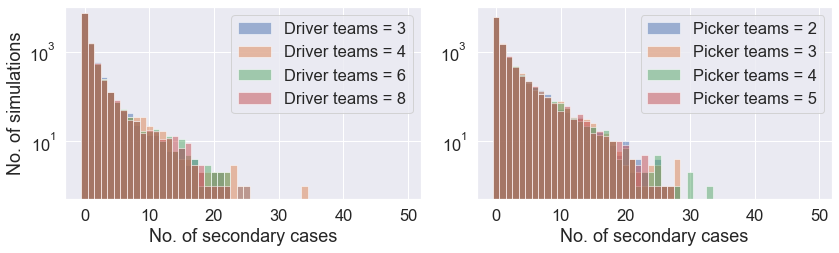

In [25]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ntd = 2
nphi = 0
for td in NDteams:
    dfh = dfall[(dfall['InfInit'] == 1)*(dfall['NDteams']==td)*(dfall['NLteams']==2)*\
                (dfall['NOteams']==1)*(dfall['TeamDistances']<1.5)]
    ax[0].hist(dfh['Ninfected'],bins=(np.arange(51)-0.5),label='Driver teams = %d'%(td),alpha=0.5)
for tl in NLteams:
    dfh = dfall[(dfall['InfInit'] == 2)*(dfall['NDteams']==3)*(dfall['NLteams']==tl)*\
                (dfall['NOteams']==1)*(dfall['TeamDistances']<1.5)]
    ax[1].hist(dfh['Ninfected'],bins=(np.arange(51)-0.5),label='Picker teams = %d'%(tl),alpha=0.5)
for i in [0,1]:    
    ax[i].set_yscale('log')
    ax[i].set_ylim((0.5,10000))
    ax[i].set_xlabel('No. of secondary cases')
    ax[i].legend()
ax[0].set_ylabel('No. of simulations')

fig.tight_layout()
fig.savefig('secondary_cases_hist.png')

Count customer infections

In [30]:
print(df.columns)

Index(['Group', 'NStaff', 'Iteration', 'FracRecovered', 'FomiteInfectionFrac',
       'CohortInfectionFrac', 'RandContactInfectionFrac', 'PairInfectionFrac',
       'RoomInfectionFrac', 'ExtIntroFrac', 'CustIntroFrac', 'CarShareInfFrac',
       'HouseShareInfFrac', 'CustomersInfected', 'IsolatorsFrac',
       'SympIsolatorsFrac', 'FPIsolatorsFrac', 'TPSympIsolatorsFrac',
       'TPAsympIsolatorsFrac', 'IndexCaseInfections', 'IndexCaseViralLoad',
       'IndexCaseInfectivity', 'OverallOutbreakLength', 'tD', 'SimType',
       'TeamTimes', 'phi', 'TeamDistances', 'InfInit', 'HouseShareFactor',
       'CarShareFactor', 'Psusc', 'Pisol', 'NDteams', 'is_cohorts',
       'p_contact', 'NOteams', 'TeamsOutside', 'NLteams', 'NRecovered'],
      dtype='object')


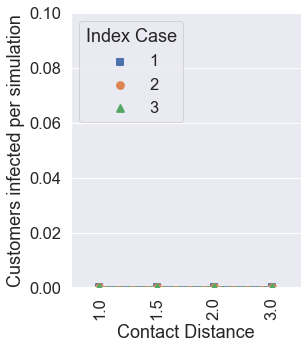

In [42]:
dfh = df[lambda df: (df['NDteams'] == 3) & (df['NLteams'] == 2) | (df['NOteams'] == 1)]

sp = sns.catplot(x='TeamDistances',y='CustomersInfected',hue='InfInit',data=dfh,\
                 markers=["s","o","^"],linestyles=["-", "--",":"], kind='point',legend=False)
sp.set(ylim=(0,0.1),xlabel='Contact Distance')
axes = sp.axes.flatten()
axes[0].set_ylabel('Customers infected per simulation')
plt.legend(loc='upper left',title='Index Case')
sp.set_xticklabels(rotation=90)
sp.savefig('Customer_infections.png')

Only weak dependence on phi, and only for small phi. Might be worth showing how NN contacts for each group varies with phi and workplace size

In [44]:
#breakdown of infection causes in the model
jobtypes = np.unique(df['Group'])
print(jobtypes)
netinfs = np.zeros((len(jobtypes),len(TDists),len(II)))
continfs = np.zeros((len(jobtypes),len(TDists),len(II)))
roominfs = np.zeros((len(jobtypes),len(TDists),len(II)))
carinfs = np.zeros((len(jobtypes),len(TDists),len(II)))
houseinfs = np.zeros((len(jobtypes),len(TDists),len(II)))
dfh = df.loc[lambda df: (df['NDteams']==3)*(df['NLteams']==2)*(df['NOteams']==2)]
for (n, g) in enumerate(jobtypes):
    dfg = dfh.loc[lambda dfh: (dfh['Group'] == g)]
    for (j,phi) in enumerate(TDists):
        dfij =  dfg.loc[lambda dfg: (dfg['TeamDistances'] == phi)]
        for (k,ii) in enumerate(II):
            dfijk =  dfij.loc[lambda dfij: (dfij['InfInit'] == ii)]

            netinfs[n,j,k] = np.mean(dfijk['CohortInfectionFrac']*dfijk['NStaff'])
            continfs[n,j,k] = np.mean(dfijk['RandContactInfectionFrac']*dfijk['NStaff'])
            roominfs[n,j,k] = np.mean(dfijk['RoomInfectionFrac']*dfijk['NStaff'])
            carinfs[n,j,k] = np.mean(dfijk['CarShareInfFrac']*dfijk['NStaff'])
            houseinfs[n,j,k] = np.mean(dfijk['HouseShareInfFrac']*dfijk['NStaff'])
# for (i,td) in enumerate(TD):
#     for (j,phi) in enumerate(Phi):
#         for (k,ii) in enumerate(II):
#             norm = netinfs[jobtypes=='All',i,j,k][0] + \
#                    continfs[jobtypes=='All',i,j,k][0] + \
#                    roominfs[jobtypes=='All',i,j,k][0]
#             if norm > 0:
#                 for (n, g) in enumerate(jobtypes): 
#                     netinfs[n,i,j,k] /= norm
#                     continfs[n,i,j,k] /= norm
#                     roominfs[n,i,j,k] /= norm

['All' 'Drivers' 'Office' 'Pickers']


In [ ]:
np.max(houseinfs)

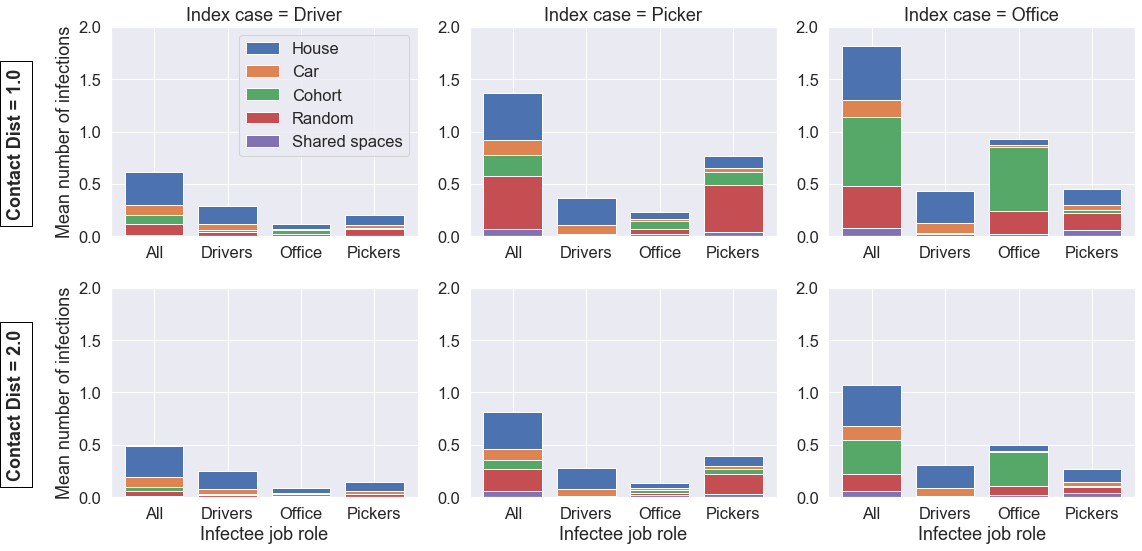

In [51]:
fig,ax = plt.subplots(2,3,figsize=(16,8))                
for k in np.arange(3):
    for (i,n) in enumerate([0,len(TDists)-2]):
        ax[i,k].bar(jobtypes, houseinfs[:,n,k] + carinfs[:,n,k] + \
                              netinfs[:,n,k] + continfs[:,n,k] + \
                              roominfs[:,n,k],label='House')
        ax[i,k].bar(jobtypes, carinfs[:,n,k] + netinfs[:,n,k] + \
                              continfs[:,n,k] + roominfs[:,n,k],\
                              label='Car')

        ax[i,k].bar(jobtypes, netinfs[:,n,k] + continfs[:,n,k] + \
                              roominfs[:,n,k],label='Cohort')
        ax[i,k].bar(jobtypes, continfs[:,n,k] + roominfs[:,n,k],\
                              label='Random')
        ax[i,k].bar(jobtypes, roominfs[:,n,k],label='Shared spaces')
        ax[i,0].set_ylabel('Mean number of infections')
        ax[i,k].set_ylim((0,2.0))
        ax[i,0].text(-2.0, 0.2, 'Contact Dist = %.1f'%TDists[n], rotation='vertical',fontweight='bold',\
            bbox={'facecolor': 'white', 'alpha': 1.0, 'pad': 7.0, 'linestyle': '-',\
                  'edgecolor': 'black'})
    ax[0,k].set_title('Index case = %s'%job[k])
    
    ax[1,k].set_xlabel('Infectee job role')
    

ax[0,0].legend()
fig.tight_layout()
fig.savefig('infection_routes.png')
####need to extract for tD = 0.25, like the rest

In [ ]:
extreme_cases_df = df.loc[lambda df: (df['Group']=='All') & (df['FracRecovered']>10/df['NStaff'])]
#plt.hist(extreme_cases_df['FracRecovered'],bins=20)
figh = sns.relplot(x='IndexCaseInfections',y='NRecovered',data=df.loc[lambda df: (df['Group']=='All')],\
                   kind='line',ci='sd')
figh.set(xlim=(0,30),ylim=(0,50))

In [ ]:
job_roles = ['Drivers','Pickers','Office']
phisel = [0.05,1.0]

second_infs_mean = np.zeros((len(job_roles),len(TD),len(phisel),len(II)))
second_infs_std = np.zeros((len(job_roles),len(TD),len(phisel),len(II))) 
for i in np.arange(len(job_roles)):
    dfi = df.loc[lambda df: (df['Group'] == job_roles[i])]
    for j in np.arange(len(TD)):
        dfij = dfi.loc[lambda df: (df['tD'] == TD[j])]
        for k in np.arange(len(phisel)):
            dfijk = dfij.loc[lambda df: (df['phi'] == phisel[k])]
            for n in np.arange(len(II)):
                dfh = dfijk.loc[lambda df: (df['InfInit'] == II[n])]
                if i == n:
                    second_infs_mean[i,j,k,n] = np.mean(dfh['NRecovered']-1)
                    second_infs_std[i,j,k,n] = np.std(dfh['NRecovered']-1)
                else:
                    second_infs_mean[i,j,k,n] = np.mean(dfh['NRecovered'])
                    second_infs_std[i,j,k,n] = np.std(dfh['NRecovered'])

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(16,8))

for k in np.arange(len(phisel)):  #row
    for n in np.arange(len(II)):  #col
        ax[k,n].stackplot(TD,[second_infs_mean[0,:,k,n],second_infs_mean[1,:,k,n],\
                                second_infs_mean[2,:,k,n]],labels=job_roles)
        ax[k,n].set_xlim((0.1,1))
        ax[k,n].set_ylim((0,10.0))
        #for i in np.arange(len(job_roles)):
        #ax[k,n].errorbar(TD,np.sum(second_infs_mean[0:i,:,k,n],0),second_infs_std[i,:,k,n])
        ax[1,n].set_xlabel('Driver contact rate')
        ax[0,n].set_title('Index case: %s'%job[n])
    ax[k,0].set_ylabel('Mean secondary infections')
    ax[k,0].text(-0.25, 0.3, 'Mixing param = %.2f'%phisel[k], rotation='vertical',fontweight='bold',
                 bbox={'facecolor': 'white', 'alpha': 1.0, 'pad': 7.0, 'linestyle': '-',\
                       'edgecolor': 'black'})
ax[0,0].legend(loc='upper left')

fig.tight_layout(pad=1)
fig.savefig('secondary_cases_cumulative.png')

In [ ]:
extreme_cases_df = dfall.loc[lambda df: (df['FracRecovered']>10/df['NStaff'])]
#plt.hist(extreme_cases_df['FracRecovered'],bins=20)
figh = sns.catplot(x='tD',y='IndexCaseInfections',col='InfInit',hue='phi',data=dfall,\
                   kind='point')
figh.set(ylim=(0,2))

count customers infected